<a href="https://colab.research.google.com/github/pranathimulaka/Bussiness_Analyst/blob/main/Bussiness_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Answer**

                                                  **Business Analyst**

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import zipfile
import io

**DOWNLOADING THE FILE**

In [24]:
# URL to the zip file
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"

# Download the file
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
    thezip.extractall('/content/')

print("Download and extraction complete.")

Download and extraction complete.


In [25]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/complaints.csv')

# Display the first few rows of the DataFrame
print(df.head())

<ipython-input-25-f033a8cbee8a>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/complaints.csv')


  Date received                                            Product  \
0    2024-03-13                                        Credit card   
1    2024-03-14  Credit reporting or other personal consumer re...   
2    2023-10-25  Credit reporting or other personal consumer re...   
3    2023-10-25                                           Mortgage   
4    2024-05-02  Money transfer, virtual currency, or money ser...   

                                  Sub-product  \
0  General-purpose credit card or charge card   
1                            Credit reporting   
2                            Credit reporting   
3                                FHA mortgage   
4                Domestic (US) money transfer   

                                               Issue  \
0  Advertising and marketing, including promotion...   
1               Incorrect information on your report   
2                        Improper use of your report   
3                         Struggling to pay mortgage   
4   

**CLEANING AND PREPROCESSING THE DATA**

**ANALYSING THE DATA**

**DATATYPE OF THE VARIABLES**

In [26]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243000 entries, 0 to 5242999
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 720.

**KNOWING THE MISSING VALUE OF THE DATA**

In [27]:
df1 = df.isnull().sum()
df1

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 3
Sub-issue                        736164
Consumer complaint narrative    3406287
Company public response         2729863
Company                               0
State                             45780
ZIP code                          30225
Tags                            4757083
Consumer consent provided?      1041536
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4474684
Complaint ID                          0
dtype: int64

**CLEANING THE MISSING VALUES**

In [28]:
# Use the correct column names in the dropna function
df = df.dropna(subset=['Date received', 'Product', 'Company', 'Submitted via', 'Date sent to company', 'Complaint ID'])

# Fill missing values in less critical columns with placeholders
df['Sub-product'].fillna('Unknown', inplace=True)
df['Sub-issue'].fillna('Unknown', inplace=True)
df['Consumer complaint narrative'].fillna('Not provided', inplace=True)
df['Company public response'].fillna('Not provided', inplace=True)
df['State'].fillna('Unknown', inplace=True)
df['ZIP code'].fillna('00000', inplace=True)
df['Tags'].fillna('Not provided', inplace=True)
df['Consumer consent provided?'].fillna('Unknown', inplace=True)
df['Consumer disputed?'].fillna('Unknown', inplace=True)
df['Issue'].fillna('Unknown', inplace=True)
df['Company response to consumer'].fillna('Unknown', inplace=True)

# Convert date columns to datetime type
df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], errors='coerce')

print("Data cleaning complete.")


Data cleaning complete.


In [29]:
df2 = df.isnull().sum()
df2

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

**COVERTING ALL VARIABLES INTO STRING**

In [30]:
# Strip leading spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


**Data Insights from Consumer Complaints Dataset**

**1. Volume of Complaints by Product**

Analyzing the distribution of complaints across different product categories helps identify which products have the most issues reported by consumers.

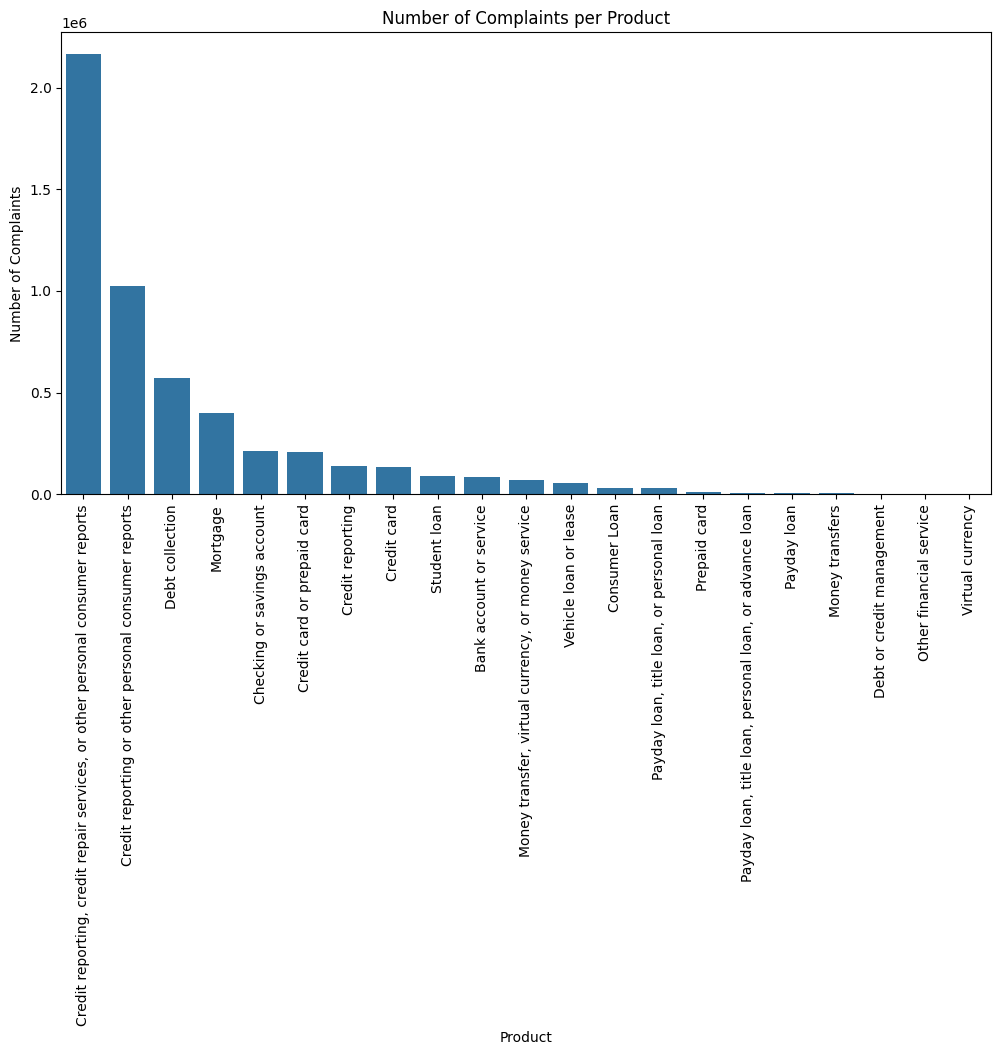

In [32]:
# Count of complaints per product
product_counts = df['Product'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Complaints per Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()

**Insight:** This plot will show which products have the highest number of complaints. For instance, products like "Credit reporting" or "Debt collection" might have higher complaint counts, indicating areas where consumers face the most issues.



**2. Trends Over Time**

Analyzing the trend of complaints over time helps understand how the number of complaints has changed and can be correlated with external events or changes in regulations.

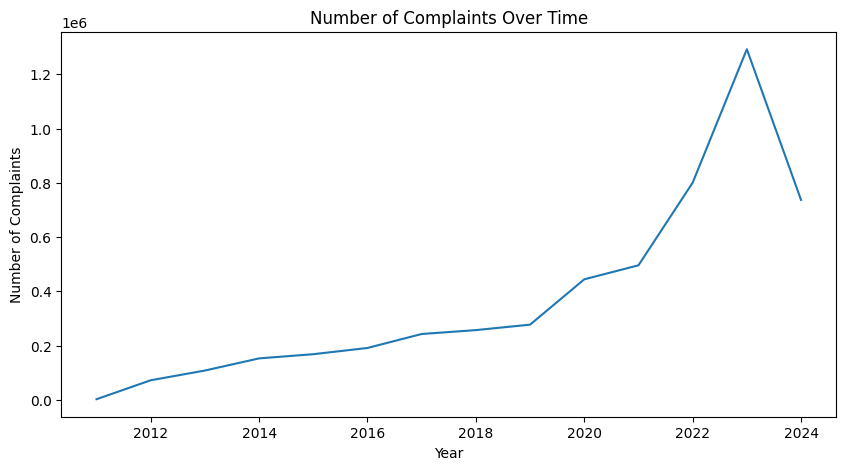

In [33]:
# Number of complaints received over time
df['Year'] = df['Date received'].dt.year
complaints_over_time = df.groupby('Year').size()

plt.figure(figsize=(10,5))
sns.lineplot(x=complaints_over_time.index, y=complaints_over_time.values)
plt.title('Number of Complaints Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.show()

**Insight:** This line plot will reveal trends such as an increase in complaints over certain years, possibly due to new regulatory changes or increased consumer awareness.

**3. Top Issues Reported**

Identifying the most common issues reported by consumers provides insight into specific problems that need attention.

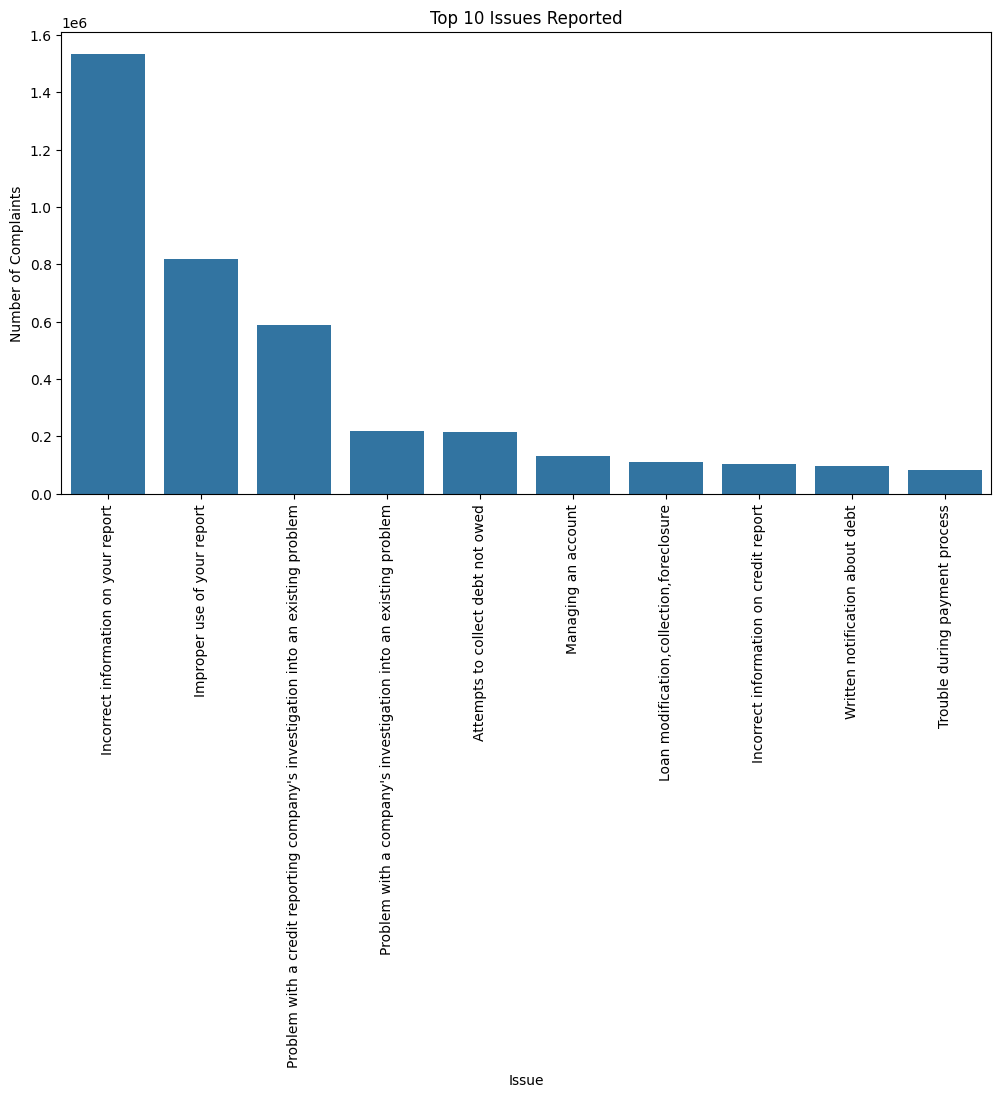

In [34]:
# Top issues reported
issue_counts = df['Issue'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=issue_counts.index, y=issue_counts.values)
plt.xticks(rotation=90)
plt.title('Top 10 Issues Reported')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.show()

**Insight:** The bar plot will highlight the top 10 issues that consumers face. Common issues might include "Incorrect information on credit report" or "Loan servicing, payments, escrow account".

**4. Company Response Analysis**

Evaluating how companies respond to complaints can provide insights into customer service effectiveness and company accountability.

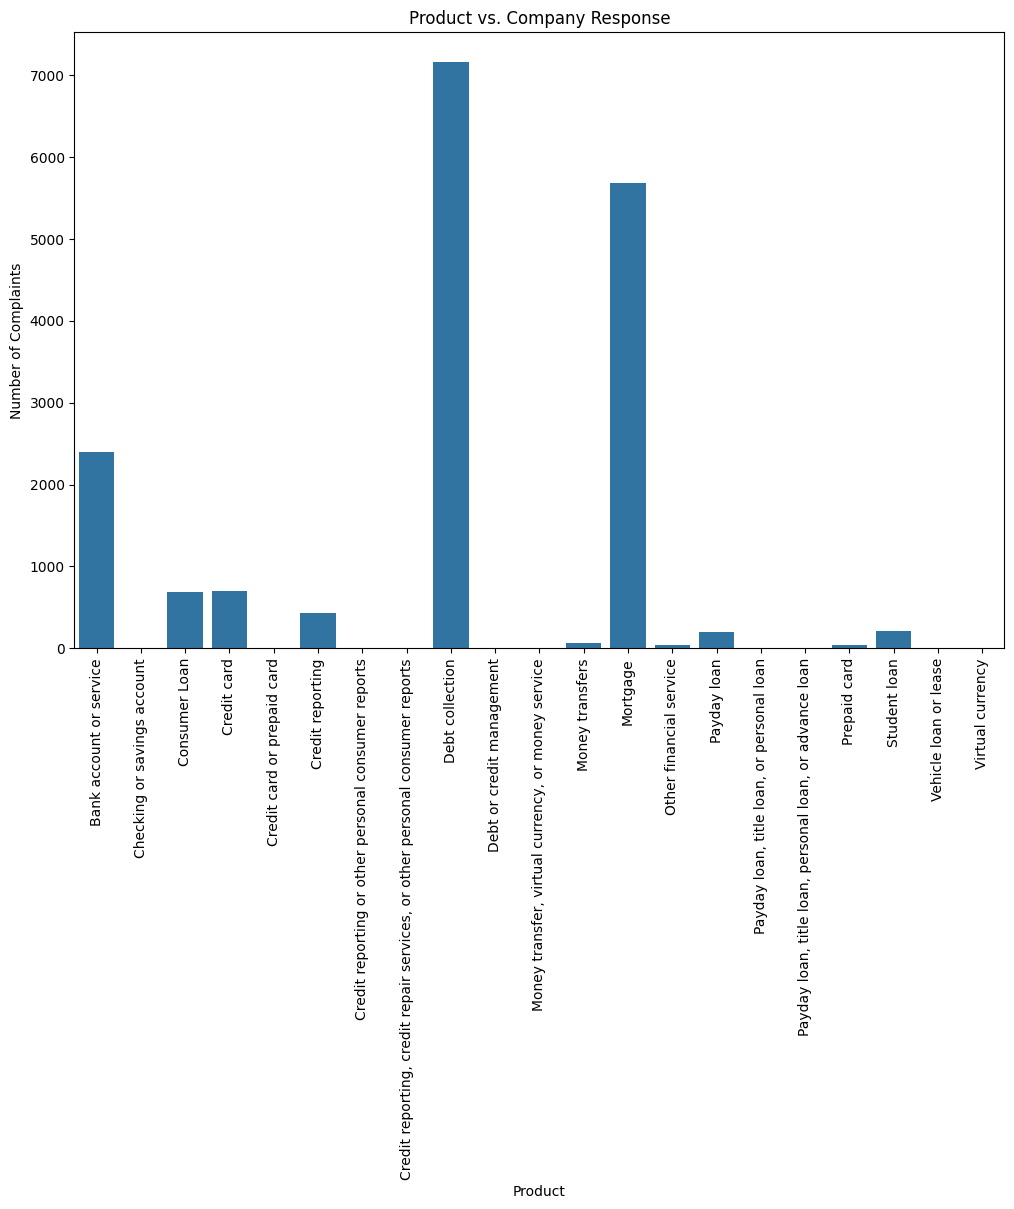

In [40]:
# Relationship between product and company response
product_response = df.groupby(['Product', 'Company response to consumer']).size().unstack().fillna(0)
# Reset index to ensure proper alignment
product_response_reset = product_response.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Product', y='Closed', data=product_response_reset)
plt.xticks(rotation=90)
plt.title('Product vs. Company Response')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.show()

**Insight:** The heatmap will show the distribution of company responses across different products. It can highlight if certain products have higher instances of unresolved complaints or specific responses like "Closed with explanation".

**5. Geographical Distribution of Complaints**

Analyzing the geographical distribution of complaints can reveal regions with higher complaint rates.

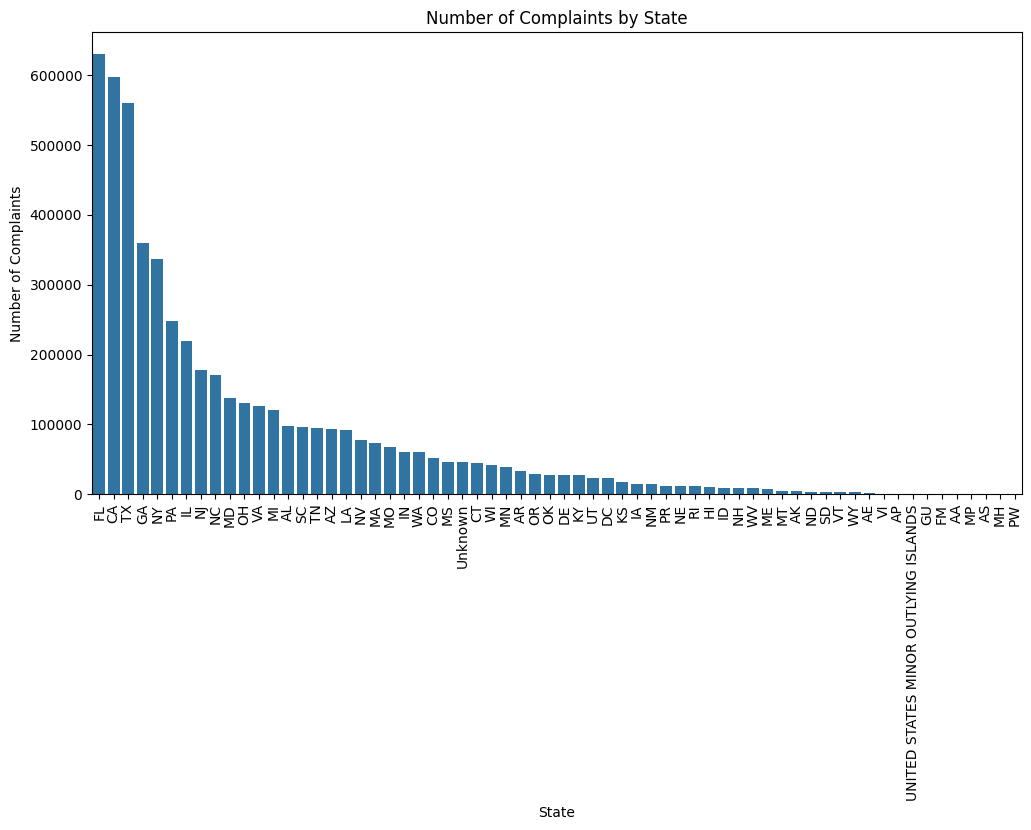

In [41]:
# Count of complaints by state
state_counts = df['State'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.show()

**Insight:** This bar plot will show which states have the highest number of complaints. States with higher populations or more financial activities might have more complaints, but anomalies can indicate regional issues.

**Summary of Insights**

**1.Volume of Complaints by Product:** Certain products like "Credit reporting" or "Debt collection" might have significantly more complaints, indicating prevalent issues in these areas.

**2.Trends Over Time:** Noticeable trends in complaint volumes over the years can be linked to regulatory changes or other significant events.

**3.Top Issues Reported:** Identifying the top issues helps focus on common problems faced by consumers, such as incorrect credit reports or loan servicing issues.

**4.Company Response Analysis:** Evaluating company responses provides insights into customer service quality and helps identify companies or products with higher unresolved complaint rates.

**5.Geographical Distribution of Complaints:** This analysis can uncover regions with higher complaint volumes, which could be due to regional practices or market conditions.

**By performing these analyses, we can gain a comprehensive understanding of consumer complaints and identify key areas for improvement and regulatory focus.**

**2.Answer**

In [49]:
# Input the unsorted array of integers
integers = input()
nums = [int(x) for x in integers.split()]
# Initialize variables
max = 1
current = 1
# Iterate through the array
for i in range(1, len(nums)):
    if nums[i] > nums[i - 1]:
        current += 1
        max = max(max, current)
    else:
        current = 1

# Print the length of the longest continuous increasing subsequence
print(max)


2 2 2 2 2
1


**3.Answer**

In [56]:
# Given list of non-negative integers
integers = input()
nums = [str(integers) for num in integers]
nums.sort(key=lambda x: x * 10, reverse=True)
largest = ''.join(nums)
largest = largest.lstrip('0')
if not largest:
    largest = '0'
# Print the largest number
print("Largest number:", f'"{largest_num}"')

10 2
Largest number: "210 "


**4.Answer**

**IMPORTING THE LIBRARIES**

In [64]:
import pandas as pd
import json
import csv

**LOADING THE DATAFRAME**

In [58]:
# Load the JSON file into a DataFrame
df = pd.read_json('/content/DT A1 sample_json (1) (1) (3).json')

# Display the first few rows of the DataFrame
print(df.head())

                                                           web-app
servlet          [{'servlet-name': 'cofaxCDS', 'servlet-class':...
servlet-mapping  {'cofaxCDS': '/', 'cofaxEmail': '/cofaxutil/ae...
taglib           {'taglib-uri': 'cofax.tld', 'taglib-location':...


**READING THE FILE FOR EXTRACTING "servlet-name" and "servlet-class" INFORMATION TO STORE THE DATA INTO "CVS"**

In [63]:
# Read the JSON file
with open('/content/DT A1 sample_json (1) (1) (3).json', 'r') as json_file:
    data = json.load(json_file)

# Extract "servlet-name" and "servlet-class" information
servlet_data = []
for servlet in data.get('servlet', []):
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_data.append({'servlet-name': servlet_name, 'servlet-class': servlet_class})

# Write the extracted data to a CSV file
csv_file = 'servlet_data.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['servlet-name', 'servlet-class'])
    writer.writeheader()
    for row in servlet_data:
        writer.writerow(row)

print(f"Data has been stored in '{csv_file}'.")

Data has been stored in 'servlet_data.csv'.
